In [152]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as spsp
from sympy import *
init_printing(use_unicode=True)

In [16]:
def fast_reshape(row_vector):
    coordinates = row_vector.shape
    return row_vector.reshape((coordinates[1], 1))

## Тест из конспекта

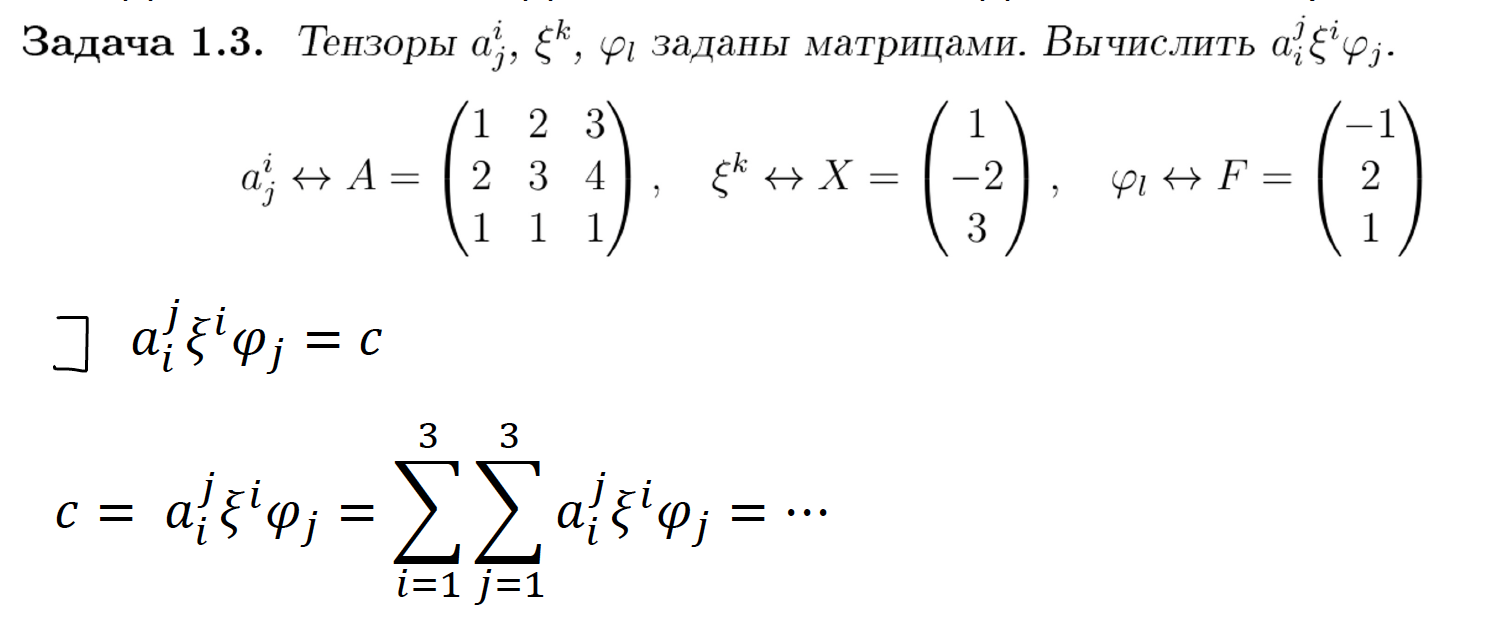

#### Работает только если после свёртки получается скаляр

In [5]:
A = np.array([[1, 2, 3], [2, 3, 4], [1, 1, 1]])
X = np.array([[1], [-2], [3]])
F = np.array([[-1], [2], [1]])

result_sum = 0
for i in range(3):
    for j in range(3):
        result_sum += A[j][i]*X[i]*F[j]

result_mul = F.transpose() @ A @ X
result_mul

array([[12]])

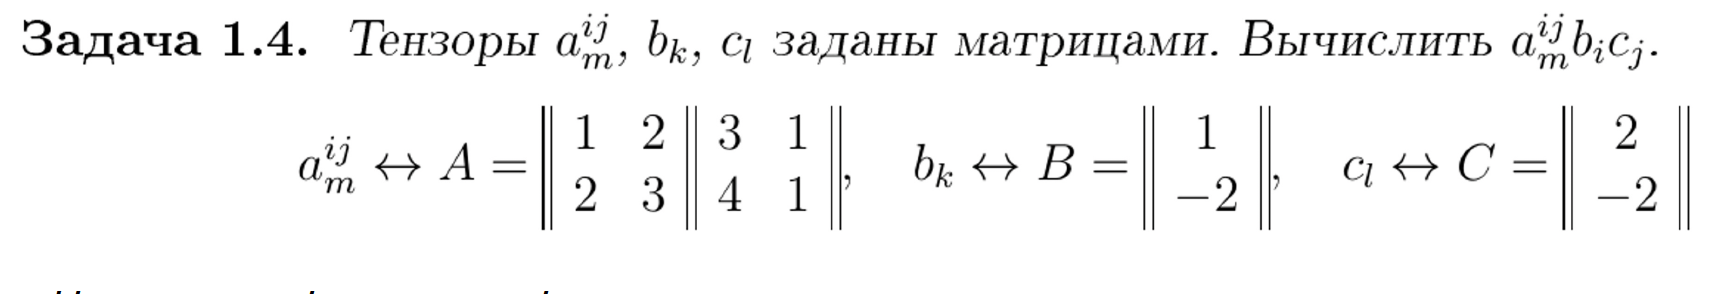

In [18]:
A = np.array([[[1, 2], [2, 3]], [[3, 1], [4, 1]]])
B = fast_reshape(np.array([[1, -2]]))
C = fast_reshape(np.array([[2, -2]]))
# a^{ij}_{m} * b_i * c_j = d_m
d1, d2 = 0, 0


for i in range(2):
    for j in range(2):
        d1 += A[0][i][j]*B[i]*C[j]
        d2 += A[1][i][j]*B[i]*C[j]
d1, d2

(array([2]), array([-8]))

# Домашка №6

## Task 1

$$a^{pmr} \leftrightarrow A \quad b_{tq} \leftrightarrow B \quad c_{sj} \leftrightarrow C$$

$$D \leftrightarrow d_j = a^{sqt} \, b_{tq} \, c_{sj}$$

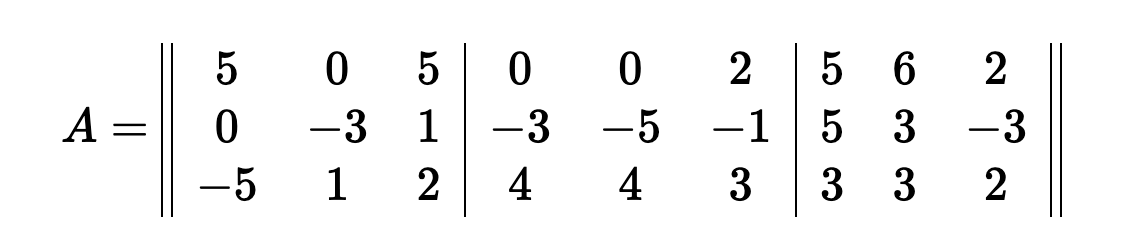

In [147]:
A = np.array([[[5, 0, 5], 
               [0, -3, 1], 
               [-5, 1, 2]], [[0, 0, 2], 
                             [-3, -5, -1], 
                             [4, 4, 3]], [[5, 6, 2], 
                                          [5, 3, -3], 
                                          [3, 3, 2]]])
A_map = {0: np.array([[5, 0, 5], [0, -3, 1], [-5, 1, 2]]), 
         1: np.array([[0, 0, 2], [-3, -5, -1], [4, 4, 3]]), 
         2: np.array([[5, 6, 2], [5, 3, -3], [3, 3, 2]])}

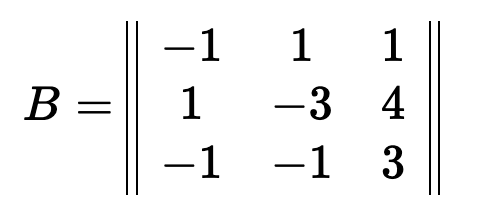

In [57]:
B = np.array([[-1, 1, 1], 
              [1, -3, 4], 
              [-1, -1, 3]])

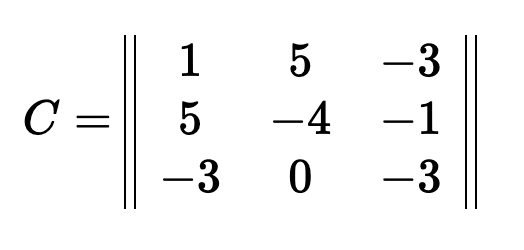

In [148]:
C = np.array([[1, 5, -3], 
              [5, -4, -1], 
              [-3, 0, -3]])

$$D \leftrightarrow d_j = a^{sqt} \, b_{tq} \, c_{sj}$$

In [151]:
D = [0, 0, 0]
for j in range(3):
    for s in range(3):
        for q in range(3):
            for t in range(3):
                D[j] += A_map[t][s][q]*B[t][q]*C[s][j]
D # tsq - 'cause t chooses layer

[-88, 59, -34]

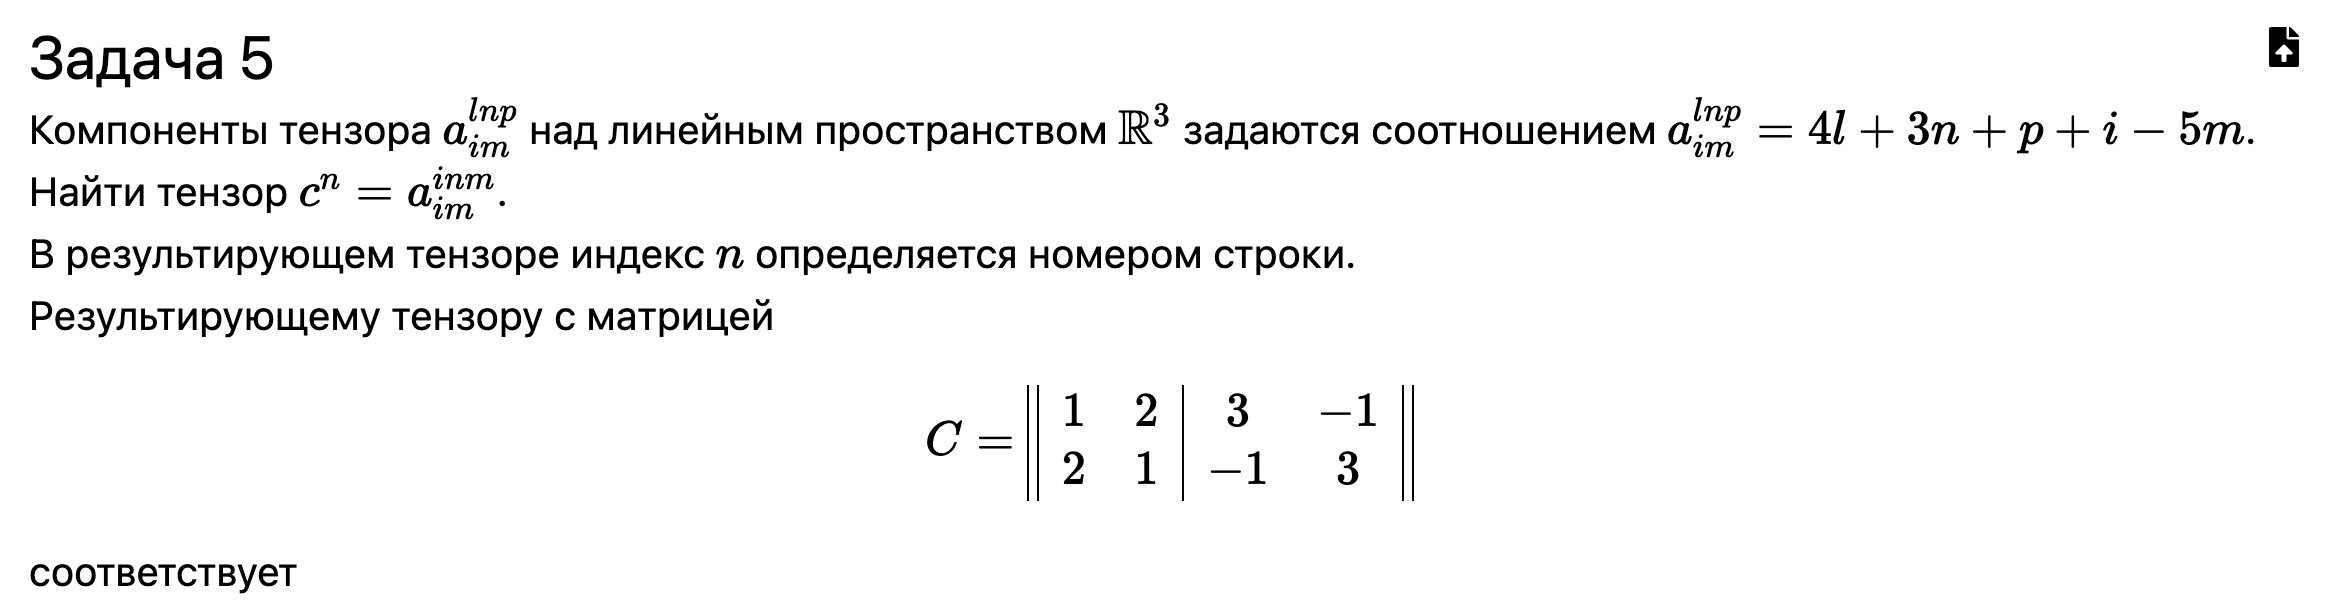

In [33]:
r = lambda a, b, c, d, e: 4*a + 3*b + c + d - 5*e
c1, c2, c3 = 0, 0, 0
for i in range(1, 4):
    for m in range(1, 4):
        c1 += r(i, 1, m, i, m)
        c2 += r(i, 2, m, i, m)
        c3 += r(i, 3, m, i, m)
c1, c2, c3 # correct

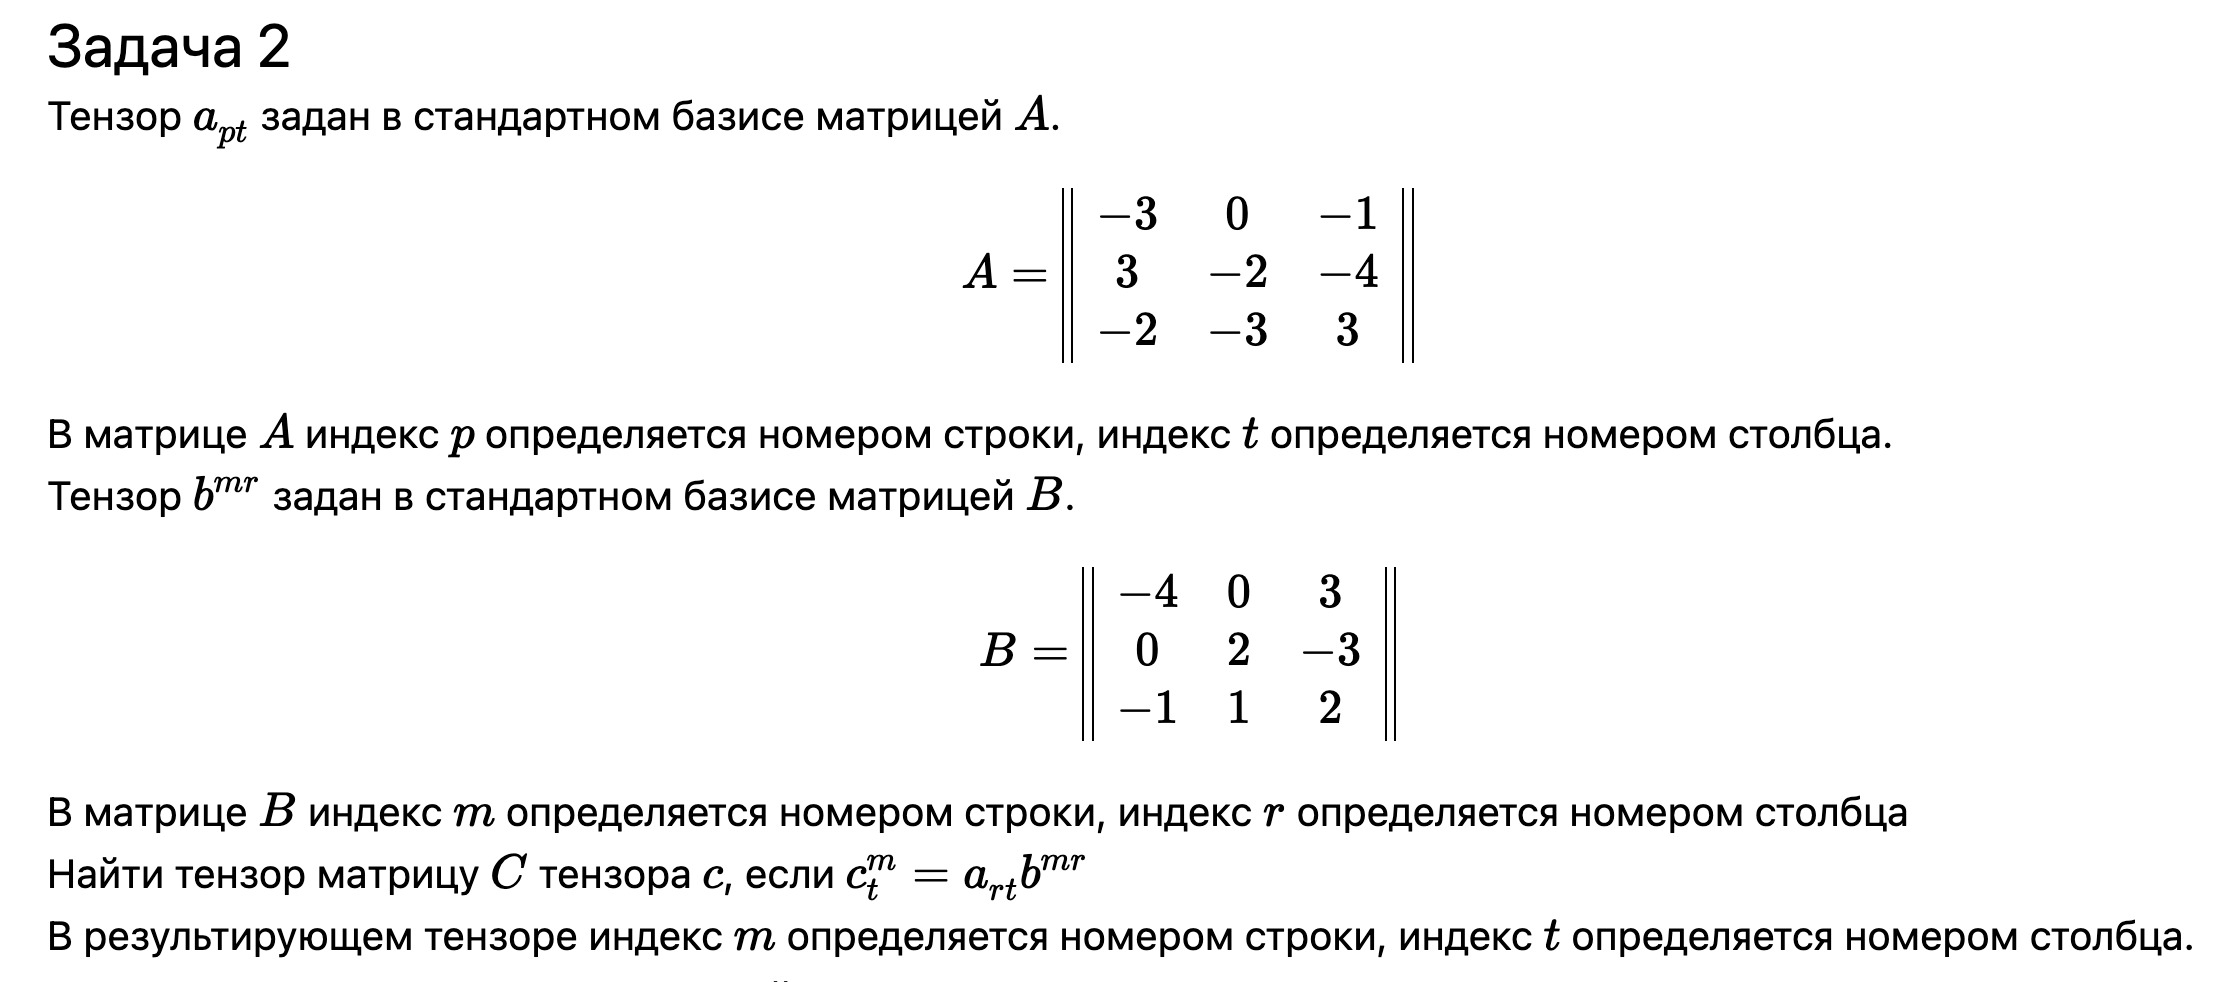

In [36]:
A = np.array([[-3, 0, -1], [3, -2, -4], [-2, -3, 3]])
B = np.array([[-4, 0, 3], [0, 2, -3], [-1, 1, 2]])
C = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        for r in range(3):
            C[i][j] += A[r][j] * B[i][r]
C

array([[  6.,  -9.,  13.],
       [ 12.,   5., -17.],
       [  2.,  -8.,   3.]])

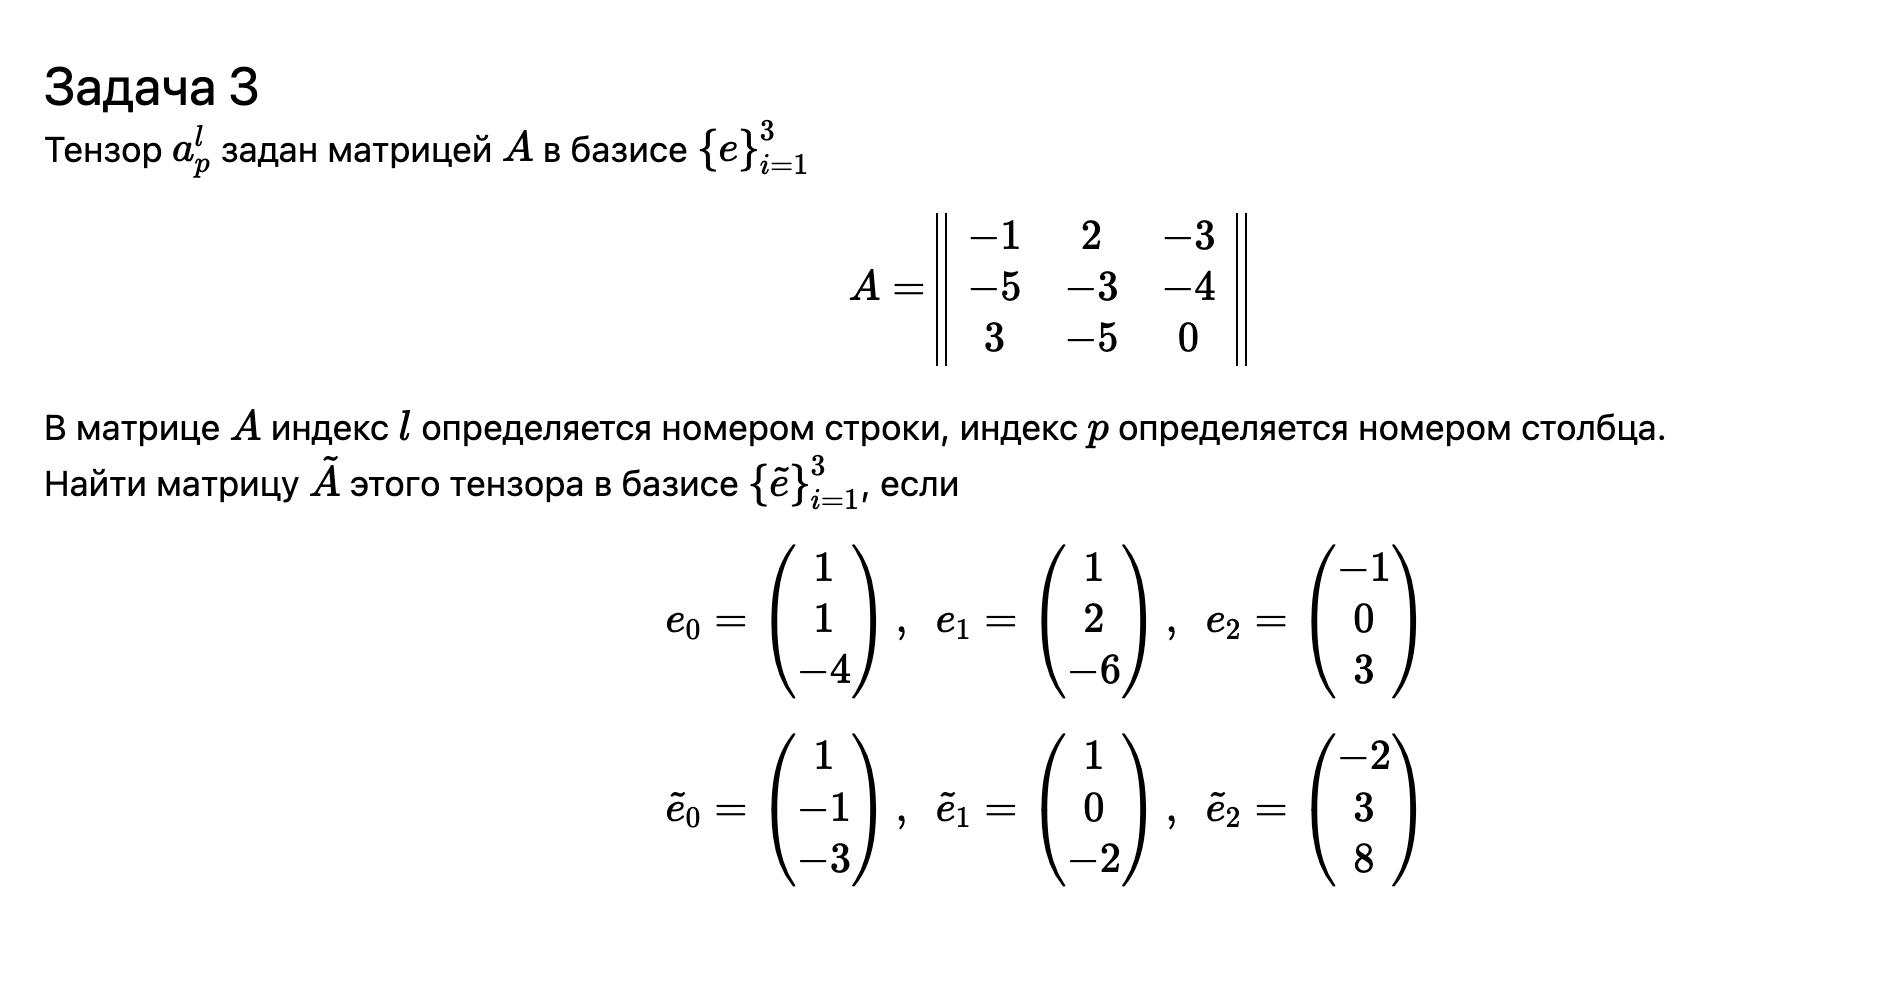

In [95]:
def new_basis(A, T, S, i, j):
    result = 0
    for l in range(3):
        for p in range(3):
            result += A[l][p] * T[i][l] * S[p][j]
    return f"W{i}{j}: {round(result)}"

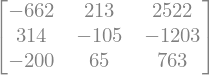

In [135]:
A = Matrix([[-1, 2, -3], 
              [-5, -3, -4], 
              [3, -5, 0]])
# Anew = Matrix((3, 3))
E = Matrix([[1, 1, -1], 
              [1, 2, 0], 
              [-4, -6, 3]])
Enew = Matrix([[1, 1, -2], 
                 [-1, 0, 3], 
                 [-3, -2, 8]])

S = Enew**(-1) * E
S * A * S**(-1)

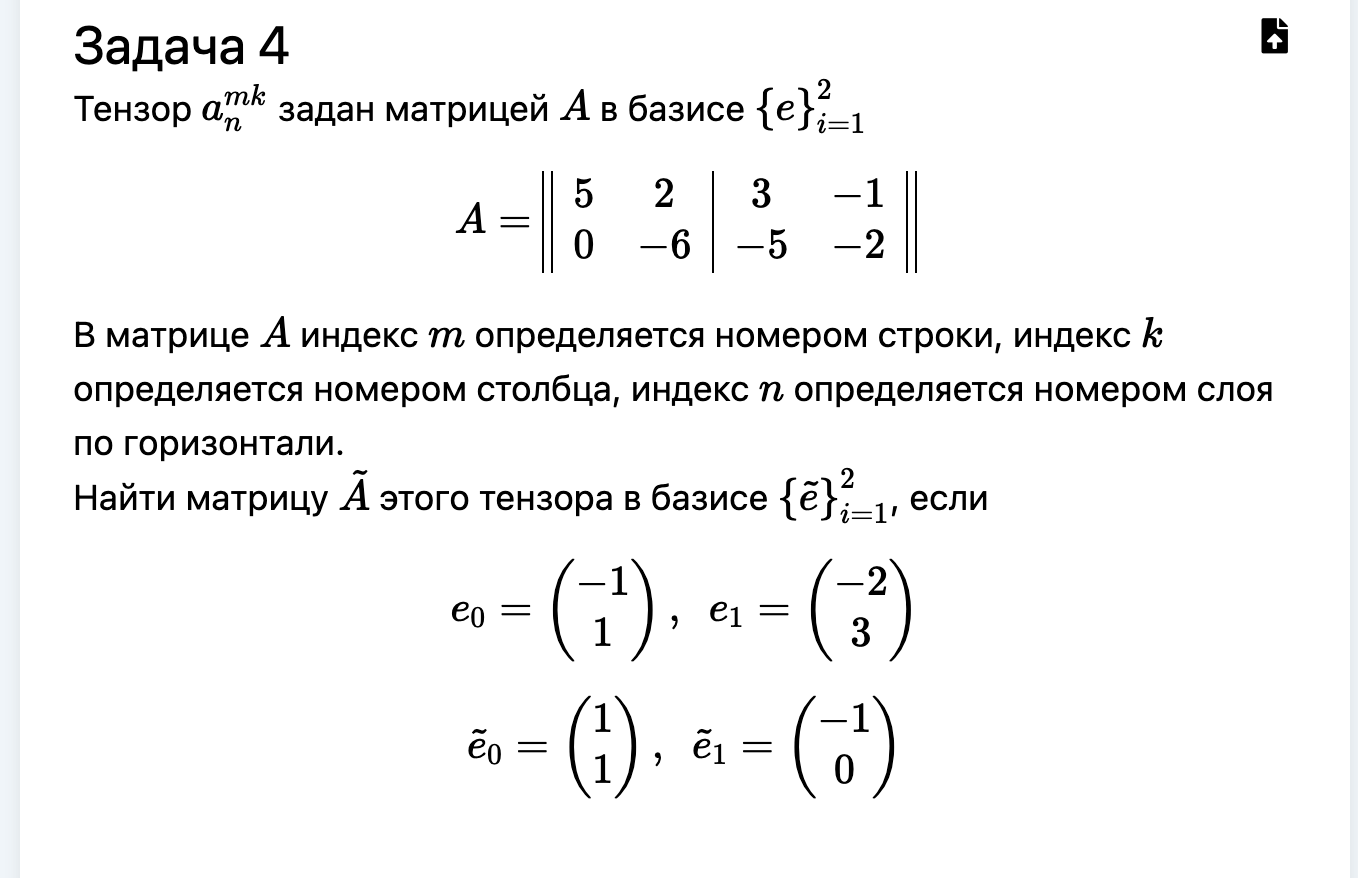

In [141]:
def n_basis(i, j, s):
    Amap = {0: [[5, 2], [0, -6]], 
            1: [[3, -1], [-5, -2]]}
    T = [[-5, 3], [2, -1]]
    result = 0
    for m in range(2):
        for k in range(2):
            for n in range(2):
                result += Amap[m][k][n] * T[n][s] * T[i][m] * T[j][k]
    return f"W^{i+1}{j+1}_{s+1}: {result}"

In [142]:
A = [[[5, 2], 
    [0, -6]], [[3, -1], 
                [-5, -2]]]
E = [[-1, -2], [1, 3]]
Enew = [[1, -1], [1, 0]]
Einv = [[-3, -2], [1, 1]]
T = [[-5, 3], [2, -1]]
S = [[1, 3], [2, 5]]
for i in range(2):
    for j in range(2):
        for s in range(2):
            if s == 1:
                print(n_basis(i, j, s))

W^11_2: -32
W^12_2: -1
W^21_2: -5
W^22_2: 7


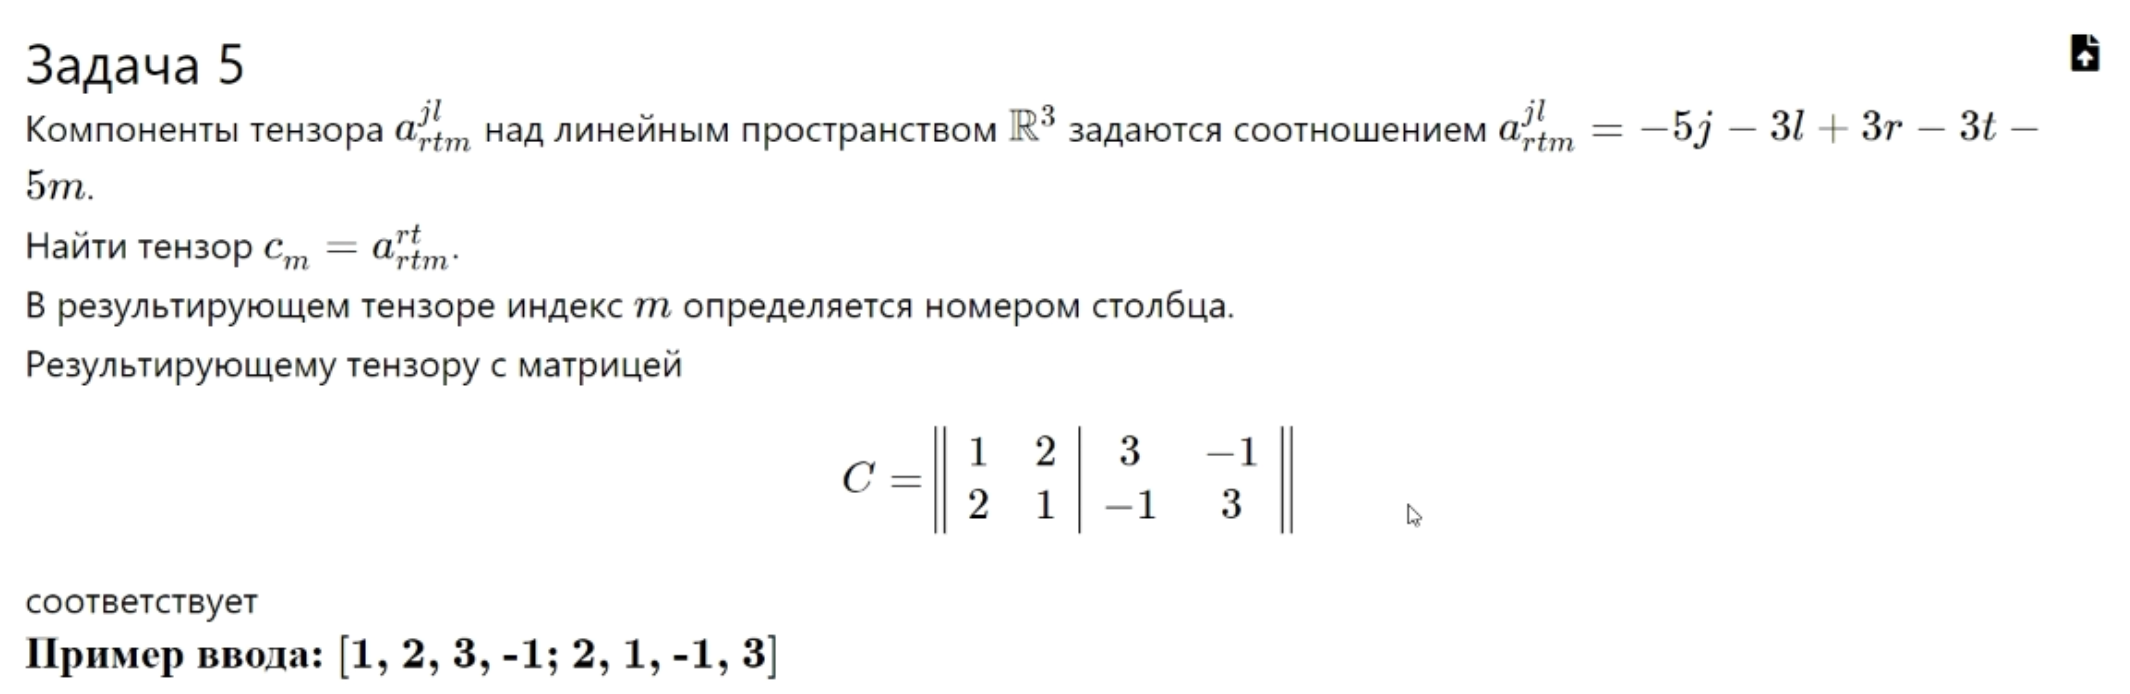

In [182]:
res = lambda a, b, c, d, e: -5*a - 3*b + 3*c -3*d - 5*e
c1, c2, c3 = 0, 0, 0
for r in range(1, 4):
    for t in range(1, 4):
        c1 += res(r, t, r, t, 1)
        c2 += res(r, t, r, t, 2)
        c3 += res(r, t, r, t, 3)
c1, c2, c3 # correct

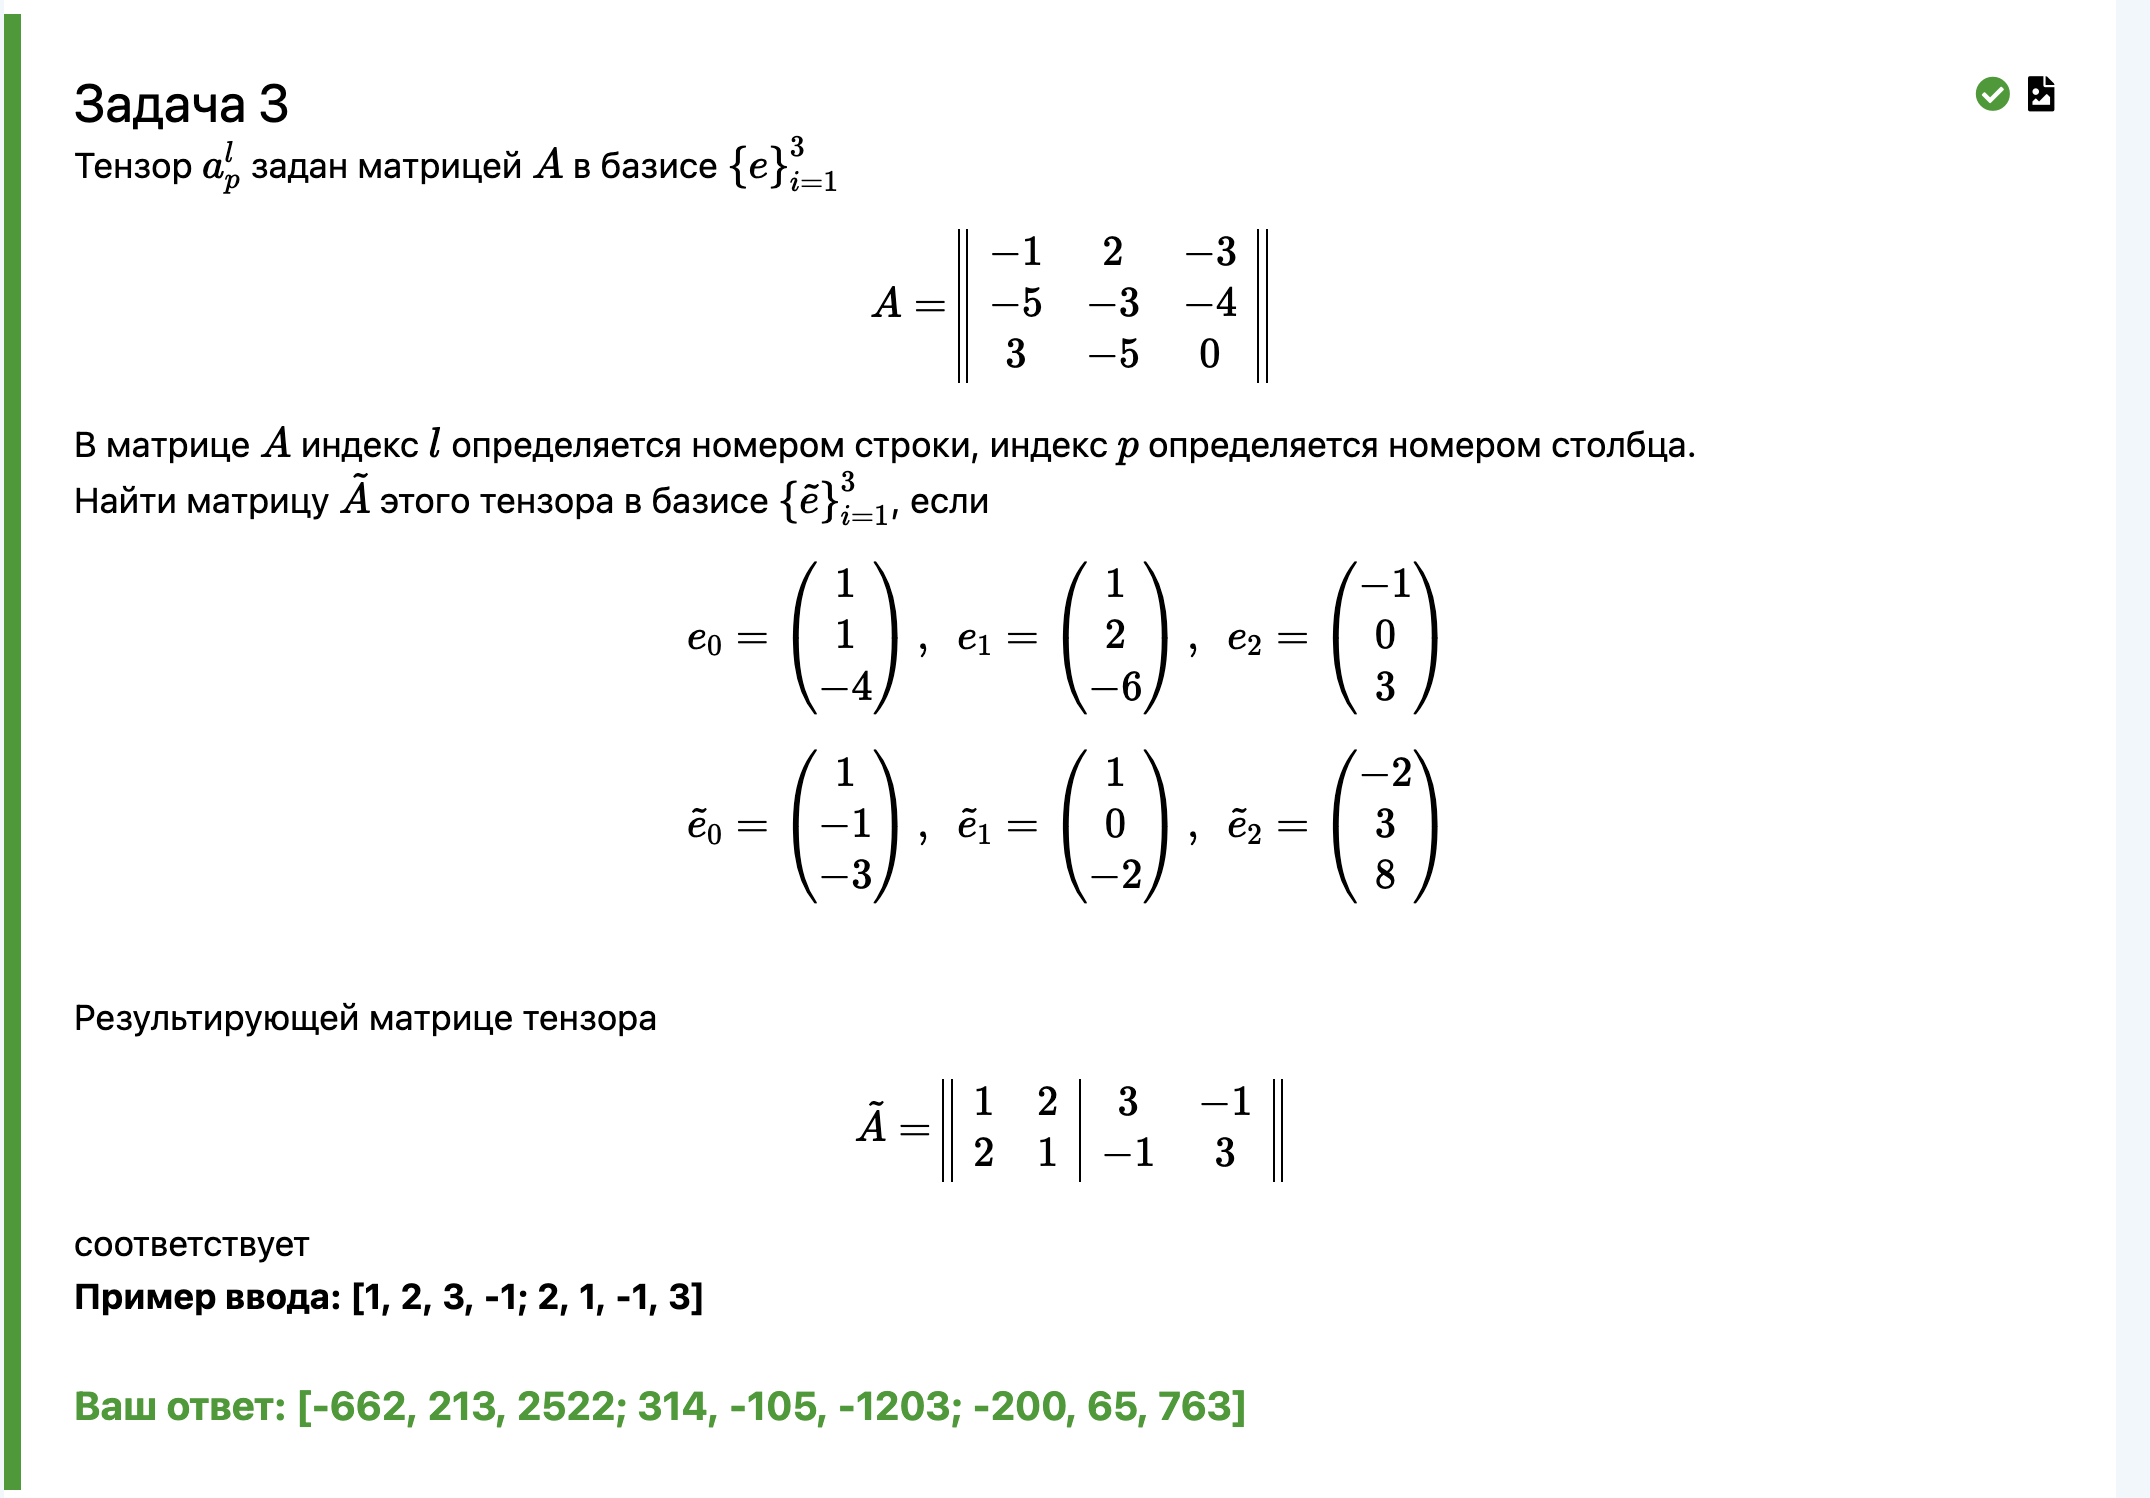

In [155]:
A = np.array([[-1, 2, -3], 
              [-5, -3, -4], 
              [3, -5, 0]])
# Anew = Matrix((3, 3))
# a^l_p
E = np.array([[1, 1, -1], 
              [1, 2, 0], 
              [-4, -6, 3]])
Enew = np.array([[1, 1, -2], 
                 [-1, 0, 3], 
                 [-3, -2, 8]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("pj, il, lp -> ij", T, S, A)
# Ковариантные - снизу, контр - сверху
# Если есть снизу и сверху, тогда будет и \tau и \sigma (T, S)
# Если есть оба снизу, тогда будет и \tau и \tau (T, T)
# Если есть оба сверху, тогда будет и \sigma и \sigma (S, S)
# У S в einsum идет наш индекс снизу, у T наш индекс сверху

array([[ -662.,   213.,  2522.],
       [  314.,  -105., -1203.],
       [ -200.,    65.,   763.]])

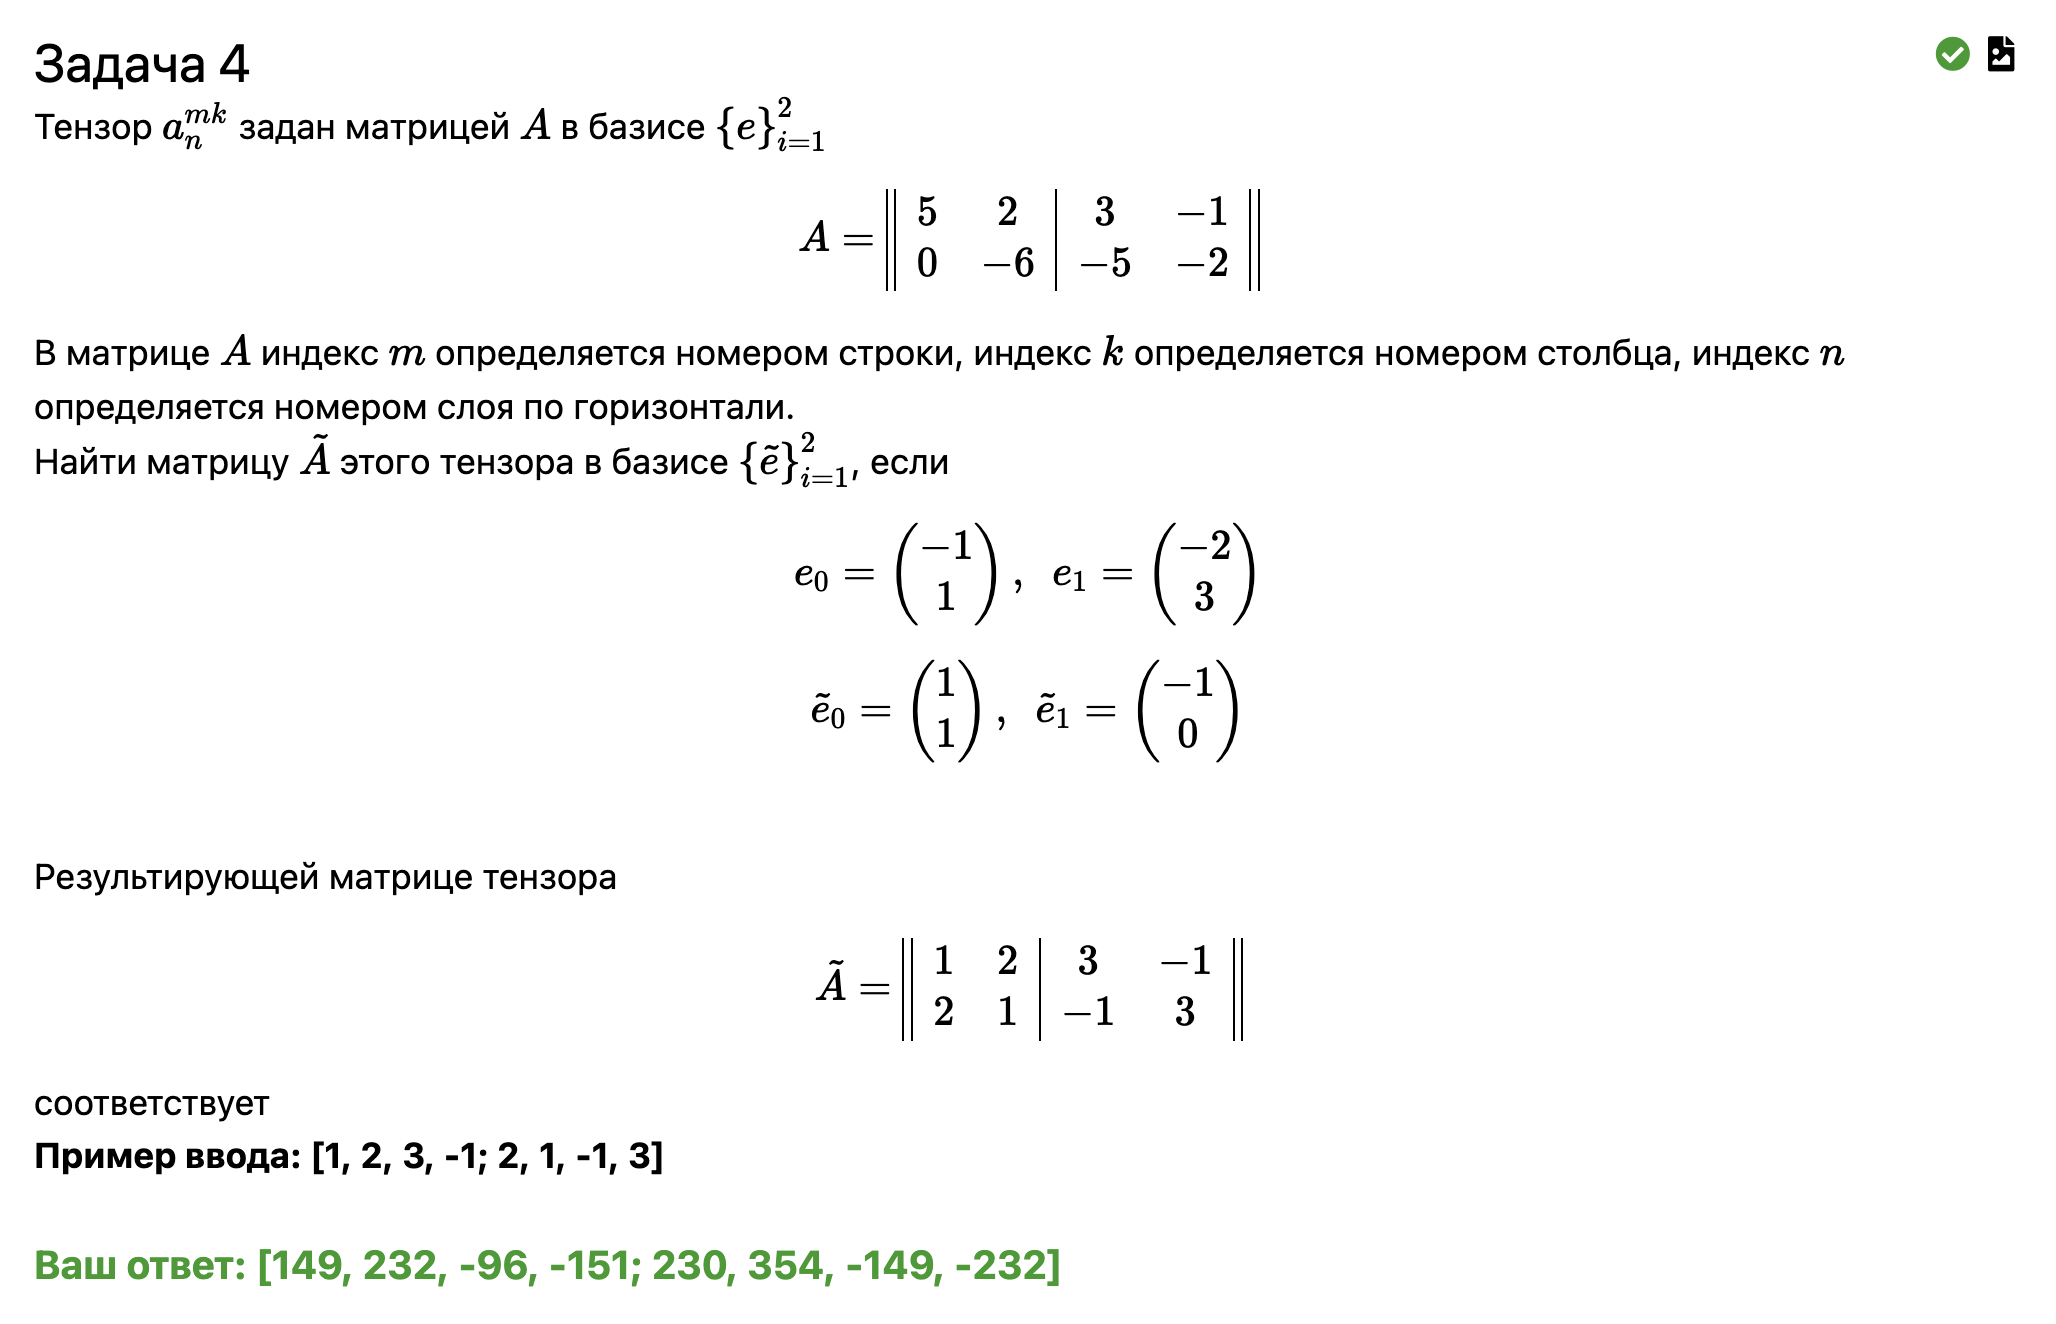

In [161]:
A = np.array([[[5, 2], [0, -6]], [[3, -1], [-5, -2]]])
E = np.array([[-1, -2], [1, 3]])
Enew = np.array([[1, -1], [1, 0]])
Einv = np.array([[-3, -2], [1, 1]])
T = np.array([[-5, 3], [2, -1]])
S = np.array([[1, 3], [2, 5]])
# mk^ n_
np.einsum("zk, xm, ny, nmk -> yxz", S, S, T, A)

array([[[ 149,  232],
        [ 230,  354]],

       [[ -96, -151],
        [-149, -232]]])

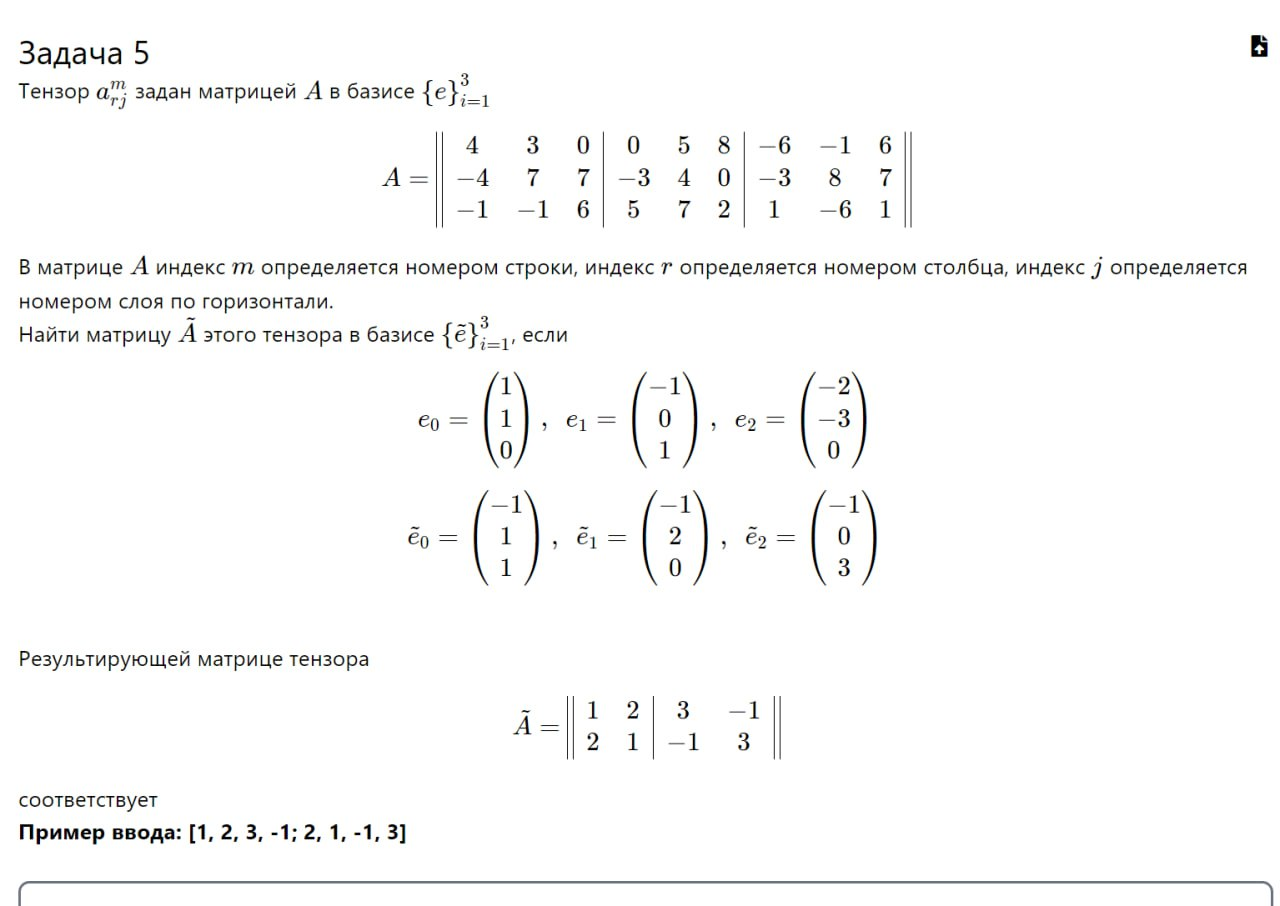

In [173]:
A = np.array([[[4, 3, 0], [-4, 7, 7], [-1, -1, 6]], [[0, 5, 8], [-3, 4, 0], [5, 7, 2]], [[-6, -1, 6], [-3, 8, 7], [1, -6, 1]]])
E = np.array([[1, -1, -2], [1, 0, -3], [0, 1, 0]])
Enew = np.array([[-1, -1, -1], [1, 2, 0], [1, 0, 3]])
9щS = la.inv(T)
np.einsum("zk, mx, ny, nmk -> yxz", S, T, T, A)

array([[[  -480.,    264.,    149.],
        [   255.,   -158.,   -100.],
        [ -1845.,   1044.,    607.]],

       [[  -494.,    257.,    144.],
        [  5163.,  -2944.,  -1704.],
        [-10207.,   5745.,   3310.]],

       [[  -574.,    340.,    193.],
        [ -7915.,   4475.,   2563.],
        [ 11727.,  -6583.,  -3775.]]])

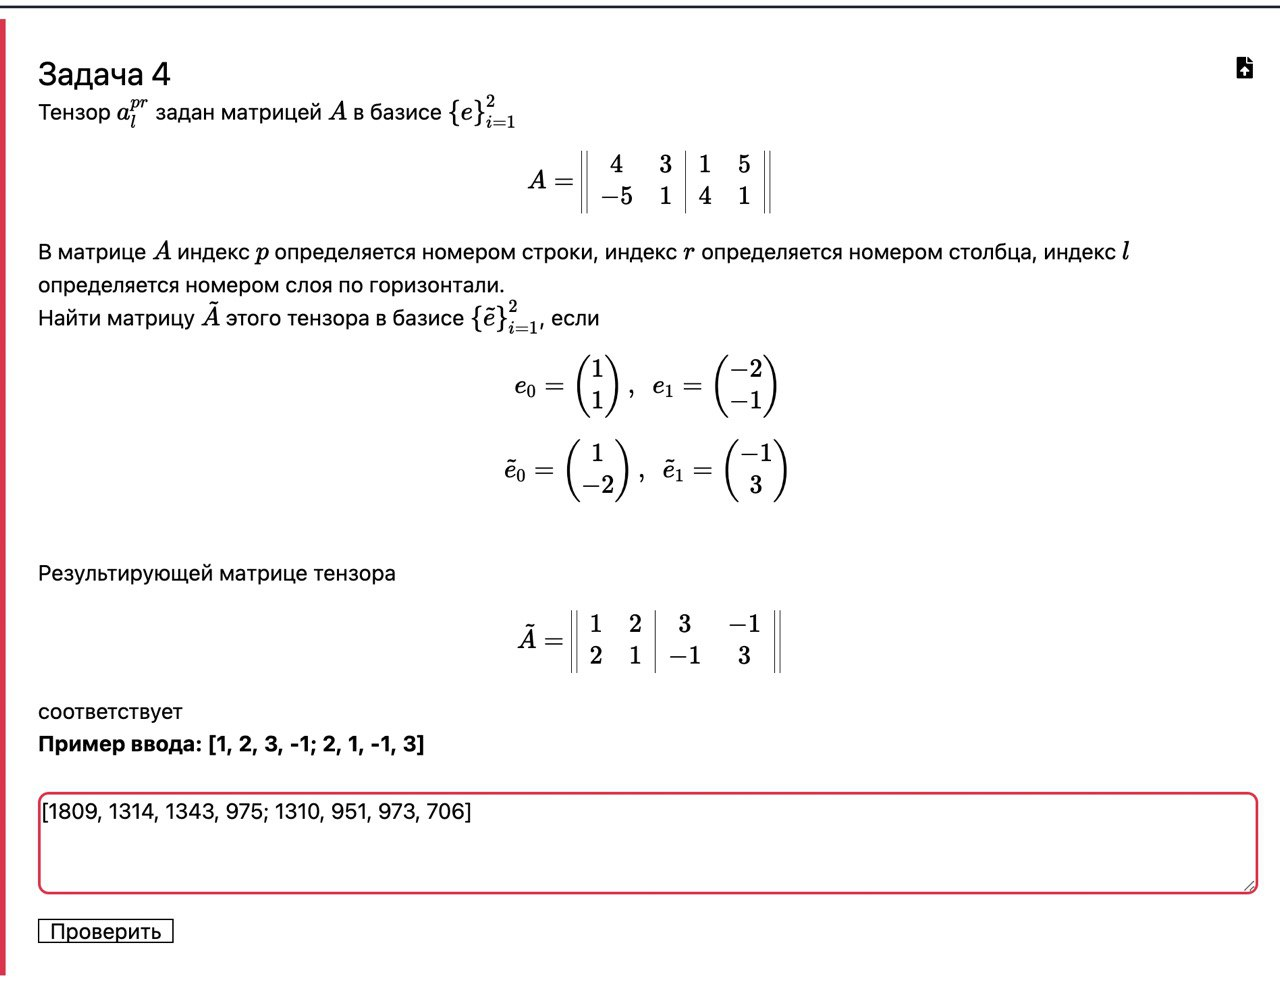

In [171]:
A = np.array([[[4, 3], [-5, 1]], [[1, 5], [4, 1]]])
E = np.array([[1, -2], [1, -1]])
Enew = np.array([[1, -1], [-2, 3]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("zk, xm, ny, nmk -> yxz", S, S, T, A) # correct

array([[[-284., -229.],
        [-186., -152.]],

       [[ 435.,  348.],
        [ 288.,  233.]]])

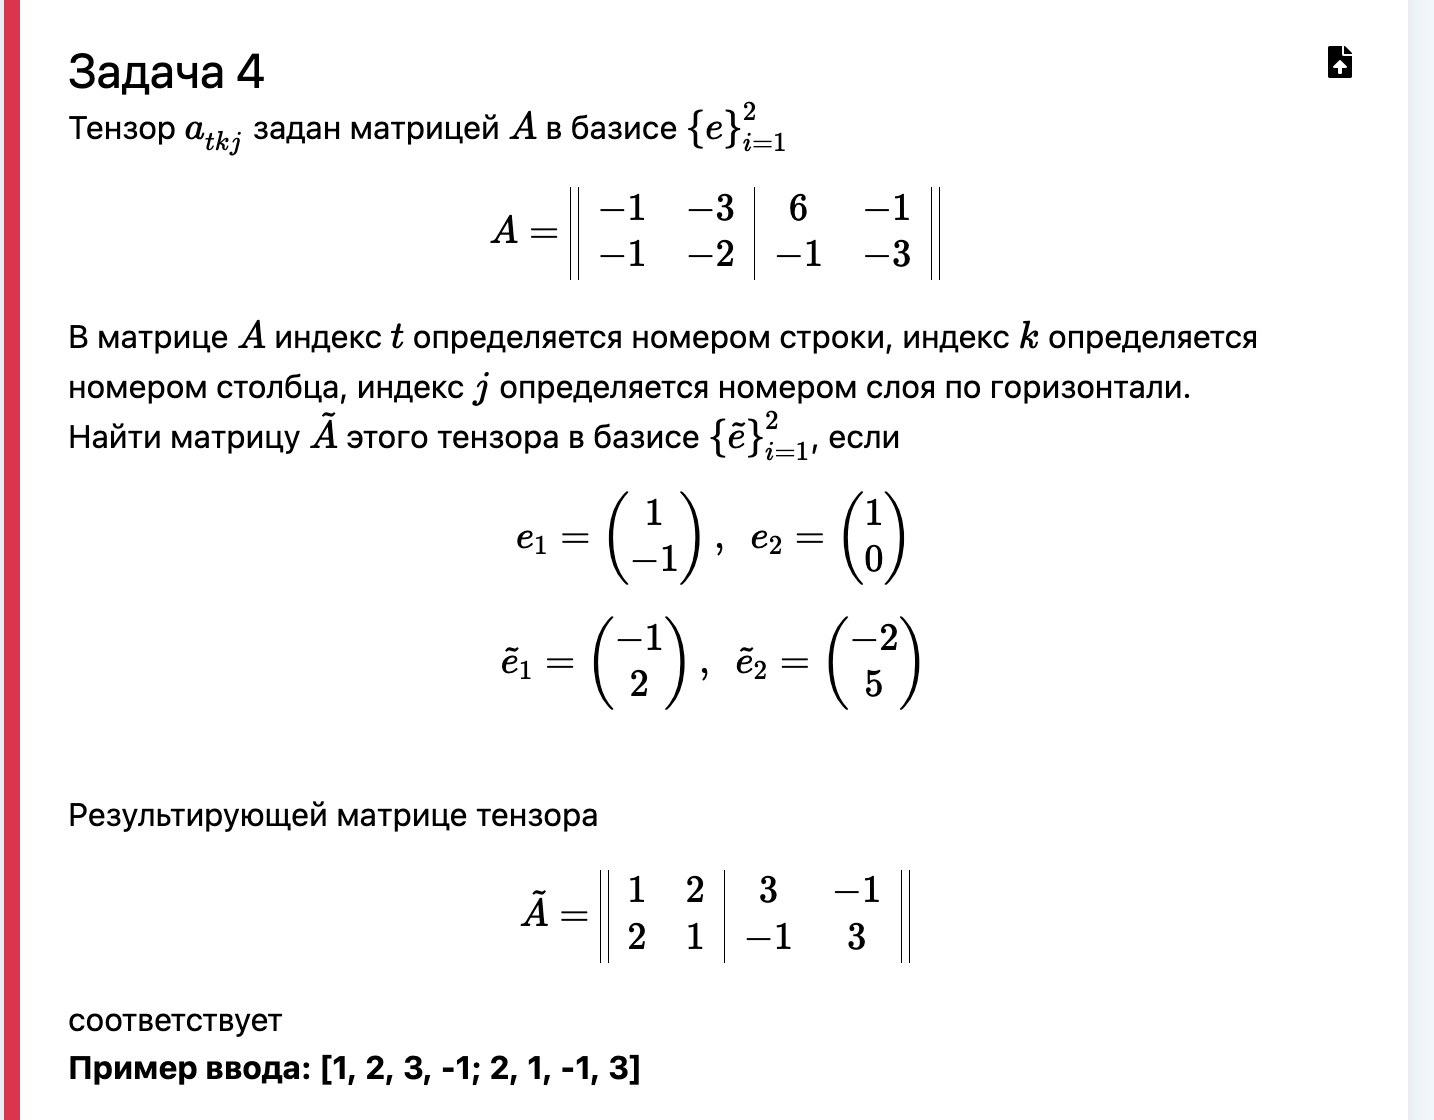

In [179]:
# A_tkj
A = np.array([[[-1, -3], [-1, -2]], [[6, -1], [-1, -3]]])
E = np.array([[1, 1], [-1, 0]])
Enew = np.array([[-1, -2], [2, 5]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("kz, mx, ny, nmk -> yxz", T, T, T, A) # correct

array([[[ 21.,  48.],
        [ 65., 151.]],

       [[ 52., 119.],
        [161., 374.]]])

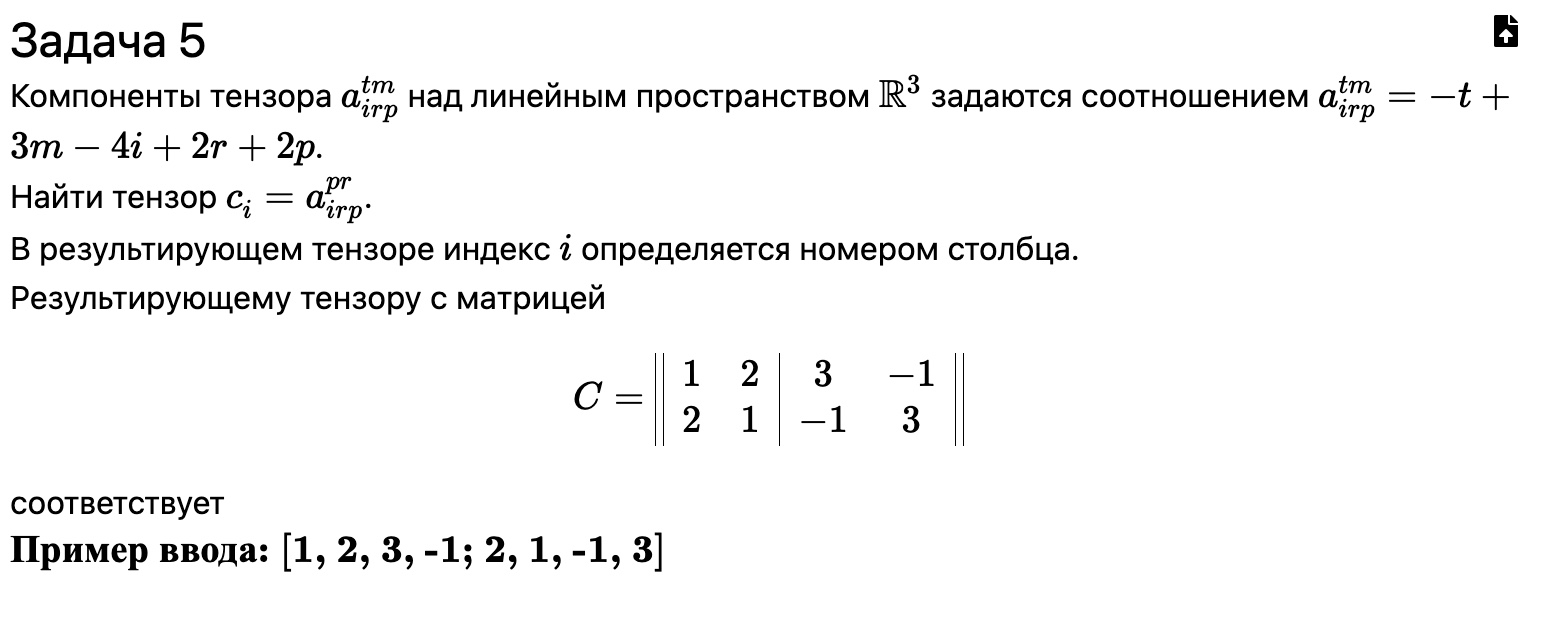

In [183]:
res = lambda a, b, c, d, e: -1*a + 3*b - 4*c + 2*d + 2*e
c1, c2, c3 = 0, 0, 0
for p in range(1, 4):
    for r in range(1, 4):
        c1 += res(p, r, 1, r, p)
        c2 += res(p, r, 2, r, p)
        c3 += res(p, r, 3, r, p)
c1, c2, c3 # correct

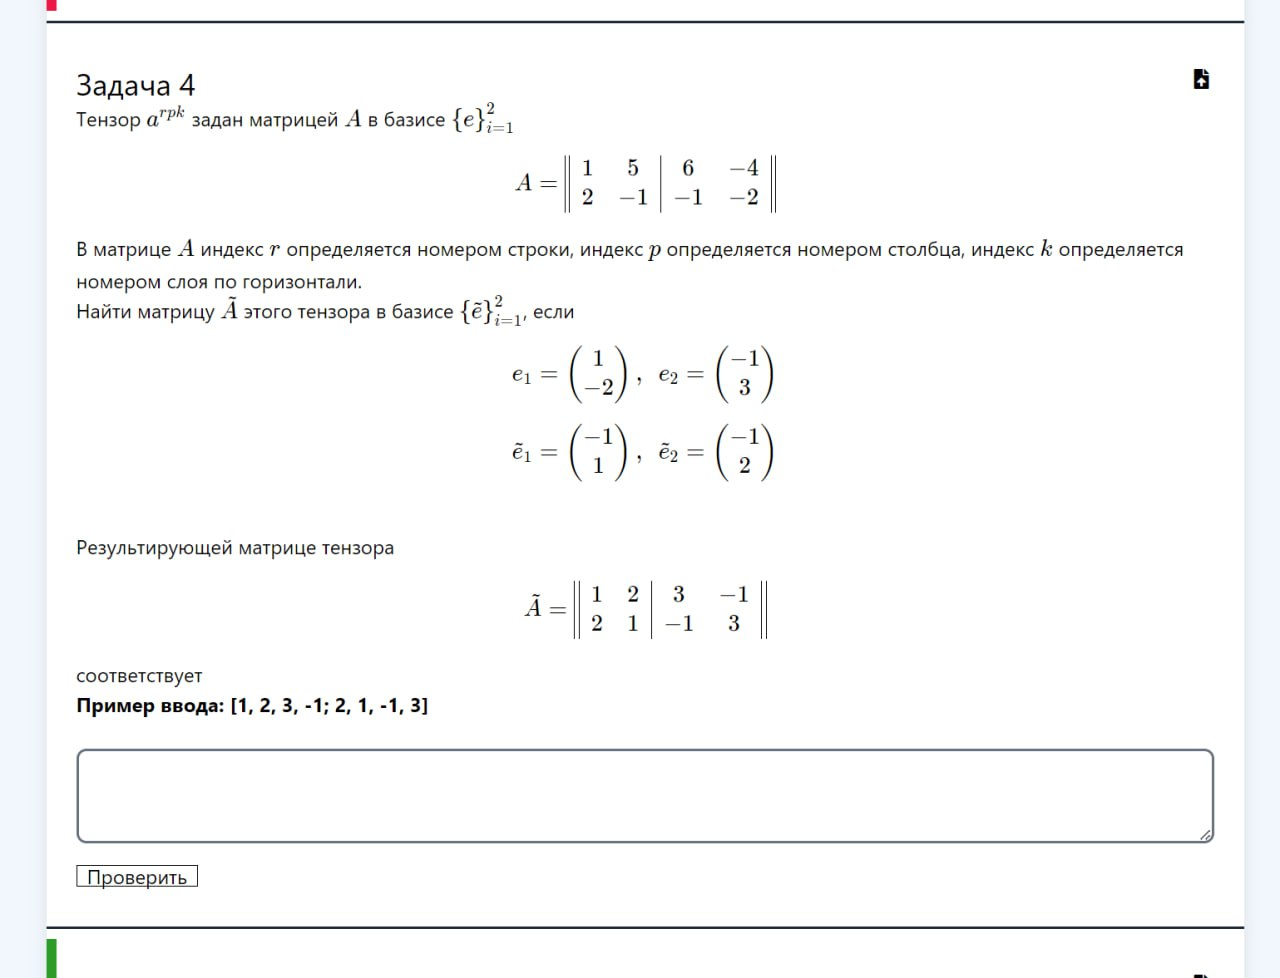

In [184]:
# A_tkj
A = np.array([[[1, 5], [2, -1]], [[6, -4], [-1, -2]]])
E = np.array([[1, -1], [-2, 3]])
Enew = np.array([[-1, -1], [1, 2]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("zk, xm, yn, nmk -> yxz", S, S, S, A) # correct

array([[[ 2., -3.],
        [ 0., -8.]],

       [[-3.,  2.],
        [-7., 33.]]])

### Andrey Rubkin

In [185]:
A = np.array([[[1, 1], [-2, -2]], [[-3, 2], [-4, 2]]])
E = np.array([[1, -1], [1, 0]])
Enew = np.array([[-1, -1], [-1, 0]])
T = la.inv(E) @ Enew
S = la.inv(T)
np.einsum("zk, xm, ny, nmk -> yxz", S, S, T, A) # correct

array([[[-1.,  1.],
        [-2.,  2.]],

       [[-3., -2.],
        [ 4.,  2.]]])